<a href="https://colab.research.google.com/github/175907/Fasttravel_rich/blob/main/Exploratory_Data_Analysis_for_Malicious_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contributor: Youssef
## Go through the given code and try to bring more info about the data

Class: IT 331 (A)

Exploratory Data Analysis (EDA) on malicious URLs is a critical process that starts with collecting and cleaning data from trusted sources to ensure safety during analysis. This process includes breaking down URLs into components and extracting features like domain characteristics and secure protocol usage, which are vital for identifying threats. Through statistical analysis and visualization, EDA helps uncover patterns and anomalies in the data, aiding in the detection of suspicious URLs. The insights gained from EDA reveal trends and targeted sectors, which are instrumental in understanding cyber threats. Additionally, this analysis sets the stage for applying machine learning by preparing the data and enhancing features based on the insights gained, ultimately aiding cybersecurity experts in developing more effective defense mechanisms against online malicious activities.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report


print("Imported all necessary packages")
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

Imported all necessary packages


In [158]:
df = pd.read_csv('Dataset/Malicious URLs.csv')

This line reads the CSV file named 'Malicious URLs.csv'


**Initial Data Exploration with Pandas in Python**

Preliminary data examination, allowing to formulate appropriate questions and hypothesis tests, and to plan further analyses.


-----------------------------------------------------
### ---------> Summary: <----------------------------

I imported tldextract for domain extraction, re for regular expressions to handle patterns in text, urlparse for parsing urls to components, math for use of entropy, counter for counting occurences of characters.

I defined entropy to calculate shannon entropy of each URL and also created a list of dangerous file extensions.

I implemented 8 new feature engineering metrics within dataset: subdomain count, IP address detection, special character count, digit count, dangerous file extension, url entropy, period count, path depth.


-----------------------------------------------------

In [159]:
import tldextract
import re
from urllib.parse import urlparse
import math
from collections import Counter

# creating a function here to calculate the entropy(randomness/complexity) of a url 
def entropy(url):
    # count each character occurrence in url
    p, lns = Counter(url), float(len(url))
    # calc entropy using Shannon entropy
    return -sum(count/lns * math.log(count/lns, 2) for count in p.values())

# list of dangerous file extensions
dangerous_extensions = ['.exe', '.dll', '.bin', '.bat', '.scr', '.js', '.jar', '.vbs', '.cmd', '.reg']
# compile expression pattern to find these extensions in the urls
pattern = re.compile('|'.join([re.escape(ext) for ext in dangerous_extensions]))

### Feature Engineering for dataset: ###
# no. of subdomains in each url
df['subdomain_count'] = df['URLs'].apply(lambda x: len(tldextract.extract(x).subdomain.split('.')) - 1)
#  if url contains an IP address
df['contains_ip'] = df['URLs'].apply(lambda x: int(any(char.isdigit() for char in x.split('//')[-1].split('/')[0])))
# count uncommon special characters
df['special_char_count'] = df['URLs'].apply(lambda x: sum(not char.isalnum() and char not in ['-', '_', '/'] for char in x))
# no. of digits in url
df['digit_count'] = df['URLs'].apply(lambda x: sum(char.isdigit() for char in x))
# if dangerous file extension exists
df['has_dangerous_extension'] = df['URLs'].apply(lambda x: int(bool(pattern.search(x))))
# calc entropy for each url
df['url_entropy'] = df['URLs'].apply(entropy)
# no. of periods in each url
df['period_count'] = df['URLs'].apply(lambda x: x.count('.'))
# calc depth of path in url
df['path_depth'] = df['URLs'].apply(lambda x: len(urlparse(x).path.split('/')) - 1)


In [160]:
df.shape

(333387, 10)

In [161]:
df.head()

URLs Class  subdomain_count  \
0  badminton2008.com/938fhnr3?kqgqaEa=vSwtSiemz   bad                0   
1                 mphtadhci5mrdlju.tor2web.org/   bad                0   
2                      stocktradex.com/087gbdv4   bad                0   
3            walterrosales.com/js/realbusiness/   bad                0   
4                              myhomemusic.net/   bad                0   

   contains_ip  special_char_count  digit_count  has_dangerous_extension  \
0            1                   3            8                        0   
1            1                   2            2                        0   
2            0                   1            4                        0   
3            0                   1            0                        0   
4            0                   1            0                        0   

   url_entropy  period_count  path_depth  
0     4.771598             1           1  
1     4.280226             2           1  
2     4.251629             1           1  
3     3.777777             1           3  
4     3.577820             1           1

In [162]:
df.columns

Index(['URLs', 'Class', 'subdomain_count', 'contains_ip', 'special_char_count',
       'digit_count', 'has_dangerous_extension', 'url_entropy', 'period_count',
       'path_depth'],
      dtype='object')

In [163]:
df.dtypes

URLs                        object
Class                       object
subdomain_count              int64
contains_ip                  int64
special_char_count           int64
digit_count                  int64
has_dangerous_extension      int64
url_entropy                float64
period_count                 int64
path_depth                   int64
dtype: object

In [164]:
df.describe()

subdomain_count    contains_ip  special_char_count    digit_count  \
count    333387.000000  333387.000000       333387.000000  333387.000000   
mean          0.026006       0.071299            2.600884       4.095994   
std           0.229572       0.257323            3.734810       8.829421   
min           0.000000       0.000000            0.000000       0.000000   
25%           0.000000       0.000000            1.000000       0.000000   
50%           0.000000       0.000000            2.000000       1.000000   
75%           0.000000       0.000000            3.000000       6.000000   
max          16.000000       1.000000          168.000000     545.000000   

       has_dangerous_extension    url_entropy   period_count     path_depth  
count            333387.000000  333387.000000  333387.000000  333387.000000  
mean                  0.013129       4.150286       1.814117       2.387967  
std                   0.113827       0.393999       1.167320       1.487082  
min                   0.000000      -0.000000       0.000000       0.000000  
25%                   0.000000       3.910819       1.000000       1.000000  
50%                   0.000000       4.155639       2.000000       2.000000  
75%                   0.000000       4.413607       2.000000       3.000000  
max                   1.000000       5.965707      32.000000      22.000000

Moving on to Data Preparation


Identifying relevant rows and columns
Feature Creation

In [165]:
df.isna().sum()

URLs                       0
Class                      0
subdomain_count            0
contains_ip                0
special_char_count         0
digit_count                0
has_dangerous_extension    0
url_entropy                0
period_count               0
path_depth                 0
dtype: int64

In [166]:
df.loc[df.duplicated()]

URLs Class  \
510       dbplumbingnt.com.au/file/files/db/file.dropbox/   bad   
934                   benditas.net.br/wp-content/message/   bad   
1010                                  bandkhasi.net/1avsq   bad   
1298                        5n7y4yihirccftc5.tor2web.org/   bad   
1358                                     dipp.lt/id4e6xcs   bad   
...                                                   ...   ...   
246602                                   tricity.wsu.edu/  good   
291379  sites.google.com/a/connectory.org/world-connec...  good   
305617                       lhs-sfusd-ca.schoolloop.com/  good   
323147                        dnr.mo.gov/shpo/Jackson.htm  good   
329612                   premierguitar.com/rss/Daily.aspx  good   

        subdomain_count  contains_ip  special_char_count  digit_count  \
510                   0            0                   3            0   
934                   0            0                   2            0   
1010                  0            0                   1            1   
1298                  0            1                   2            5   
1358                  0            0                   1            2   
...                 ...          ...                 ...          ...   
246602                0            0                   2            0   
291379                0            0                   3            0   
305617                0            0                   2            0   
323147                0            0                   3            0   
329612                0            0                   2            0   

        has_dangerous_extension  url_entropy  period_count  path_depth  
510                           0     4.120885             3           5  
934                           0     3.897300             2           3  
1010                          0     3.787144             1           1  
1298                          0     4.116265             2           1  
1358                          0     3.625000             1           1  
...                         ...          ...           ...         ...  
246602                        0     3.500000             2           1  
291379                        0     4.176444             3           4  
305617                        0     3.553090             2           1  
323147                        0     3.912114             3           2  
329612                        0     3.991729             2           2  

[9208 rows x 10 columns]

In [167]:
df.loc[df.duplicated(subset='Class')]

URLs Class  \
1                           mphtadhci5mrdlju.tor2web.org/   bad   
2                                stocktradex.com/087gbdv4   bad   
3                      walterrosales.com/js/realbusiness/   bad   
4                                        myhomemusic.net/   bad   
5                                aquatixbottle.com/vkZuz9   bad   
...                                                   ...   ...   
333382                  musicianspage.com/musicians/13871  good   
333383  coatingsworld.com/contents/view_breaking-news/...  good   
333384   artfact.com/artist/avery-milton-clark-kianfqzygj  good   
333385                   nunsandsisters.com/grey_nun.html  good   
333386  theracesite.com/index.cfm?template=magazine&ma...  good   

        subdomain_count  contains_ip  special_char_count  digit_count  \
1                     0            1                   2            2   
2                     0            0                   1            4   
3                     0            0                   1            0   
4                     0            0                   1            0   
5                     0            0                   1            1   
...                 ...          ...                 ...          ...   
333382                0            0                   1            5   
333383                0            0                   1            8   
333384                0            0                   1            0   
333385                0            0                   2            0   
333386                0            0                   6            5   

        has_dangerous_extension  url_entropy  period_count  path_depth  
1                             0     4.280226             2           1  
2                             0     4.251629             1           1  
3                             0     3.777777             1           3  
4                             0     3.577820             1           1  
5                             0     4.136842             1           1  
...                         ...          ...           ...         ...  
333382                        0     3.884859             1           2  
333383                        0     4.496160             1           5  
333384                        0     4.222794             1           2  
333385                        0     4.012199             2           1  
333386                        0     4.506124             2           1  

[333385 rows x 10 columns]

Visualizing the distribution of the most common URLs in the dataset. By examining the pie chart, histogram to quickly see if certain URLs dominate the dataset, which could be a point of interest for further investigation, especially if some of these prevalent URLs are known to be malicious or benign. This visualization helps in understanding the data's composition and identifying potential patterns or anomalies worth exploring in more depth.

<Axes: ylabel='count'>

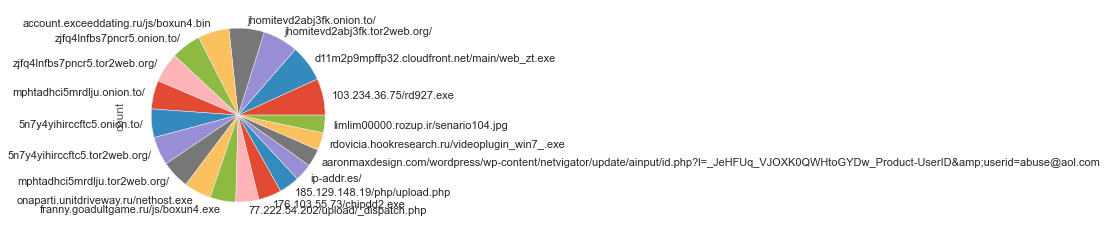

In [168]:
df['URLs'].value_counts() \
.head(20) \
.plot(kind='pie')

<Axes: title={'center': 'Common Used URLs'}, ylabel='Frequency'>

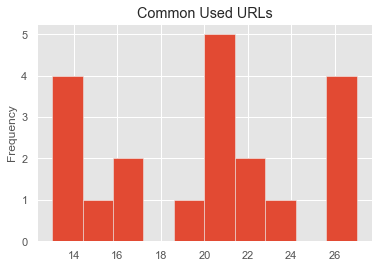

In [169]:
df['URLs'].value_counts() \
.head(20) \
.plot(kind='hist',title='Common Used URLs')

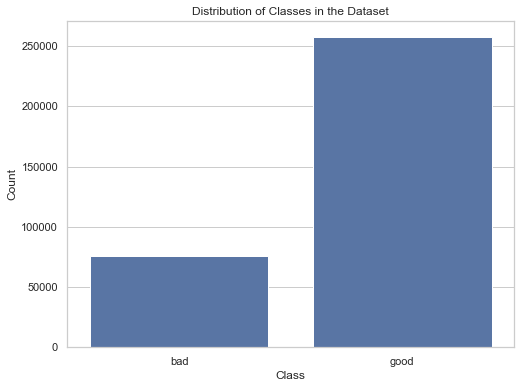

In [170]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/var/folders/v5/p5r45k6s1c32h_lnrmtwl5tw0000gn/T/ipykernel_2676/670371617.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_urls.values, y=top_urls.index, palette="viridis")


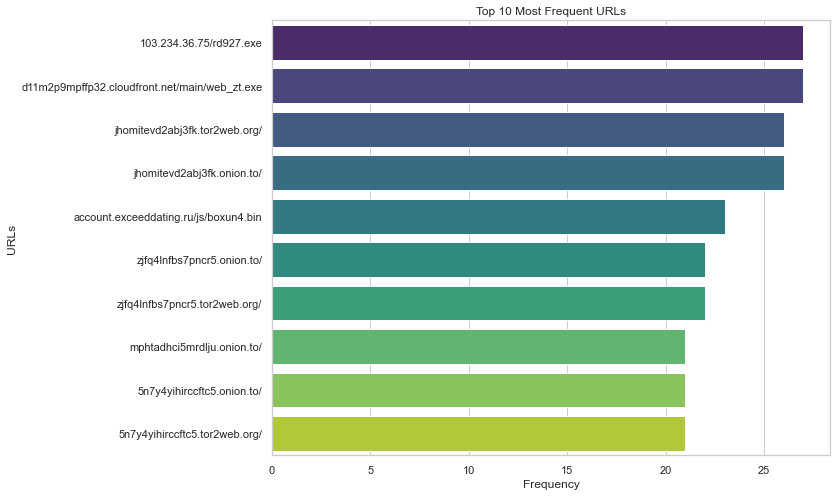

In [171]:
# Plotting the top 10 most frequent URLs
top_urls = df['URLs'].value_counts().head(10)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_urls.values, y=top_urls.index, palette="viridis")
plt.title('Top 10 Most Frequent URLs')
plt.xlabel('Frequency')
plt.ylabel('URLs')
plt.show()

**FEATURE UNDERSTANDING**

Plotting interpretative feature Ditributions

Derive and analyze new features from URLs that could potentially help in identifying malicious URLs. It highlights how features like URL length and the use of HTTPS protocol might vary between malicious and benign URLs, providing insights that could improve the accuracy of malicious URL detection models.

In [172]:
df['URL_length'] = df['URLs'].apply(len)

# Feature to check if the URL uses HTTPS
df['HTTPS'] = df['URLs'].apply(lambda x: 1 if 'https://' in x else 0)

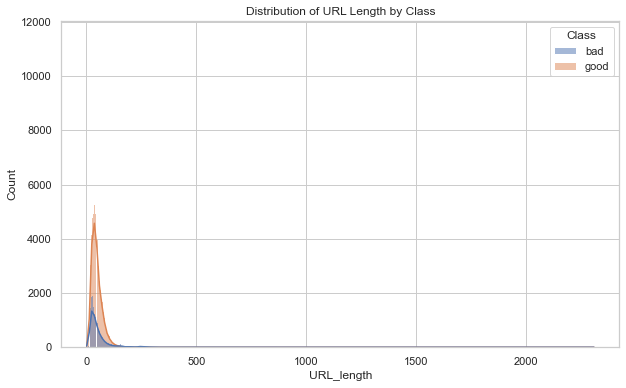

In [173]:
# Distribution of URL length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='URL_length', hue='Class', kde=True)
plt.title('Distribution of URL Length by Class')
plt.show()

This plot helps to understand the relationship between the use of HTTPS and the likelihood of a URL being classified as malicious or benign. It could reveal patterns such as a higher prevalence of HTTPS among benign URLs or vice versa, providing insights into whether the usage of HTTPS is a significant factor in classifying URLs as malicious or benign.

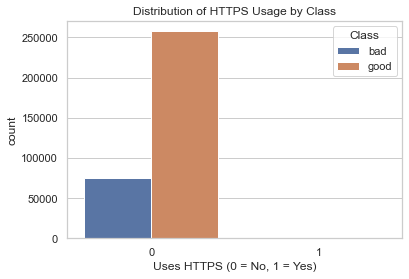

In [174]:
# Countplot for HTTPS feature
sns.countplot(x='HTTPS', hue='Class', data=df)
plt.title('Distribution of HTTPS Usage by Class')
plt.xlabel('Uses HTTPS (0 = No, 1 = Yes)')
plt.show()

-----------------------------------------------------------------------------------------------------
### ---------> Visualizations: <----------------

Used matplotlib and seaborn to visualize all tables, and created new visualizations for all the newly implemented features. Also implemented a setup_figure function to set up all new feature engineering figures so that I don't repeat code for every feature.

-----------------------------------------------------------------------------------------------------

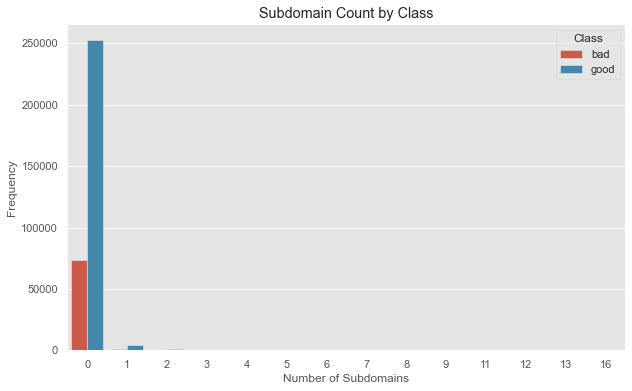

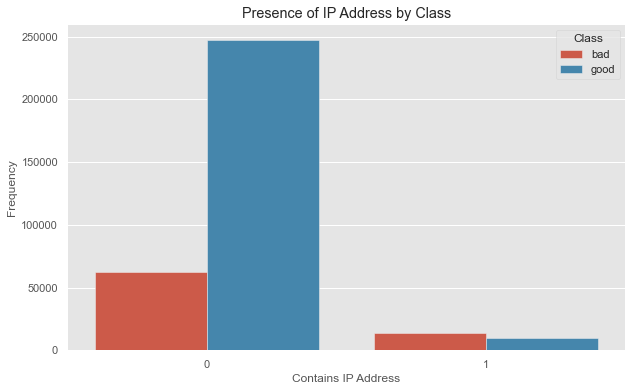

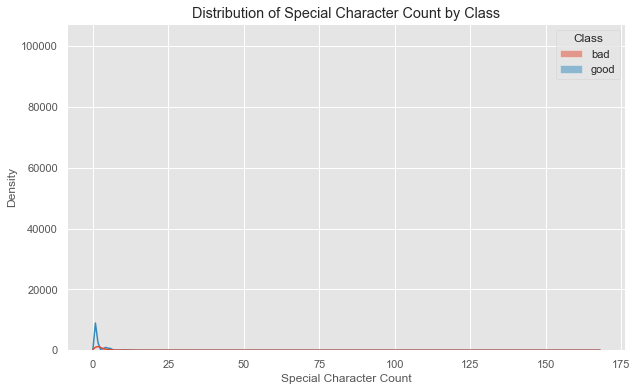

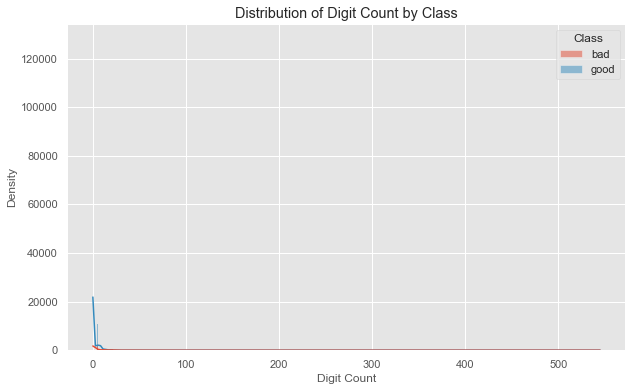

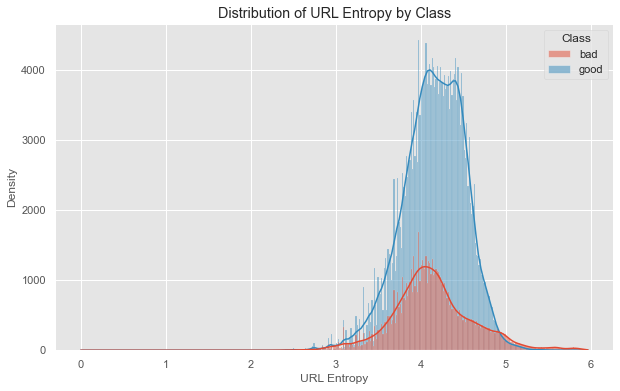

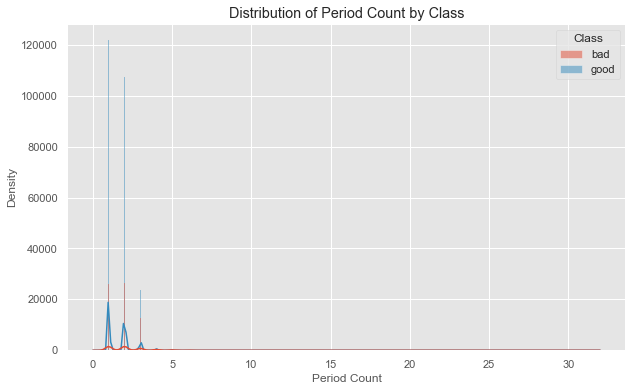

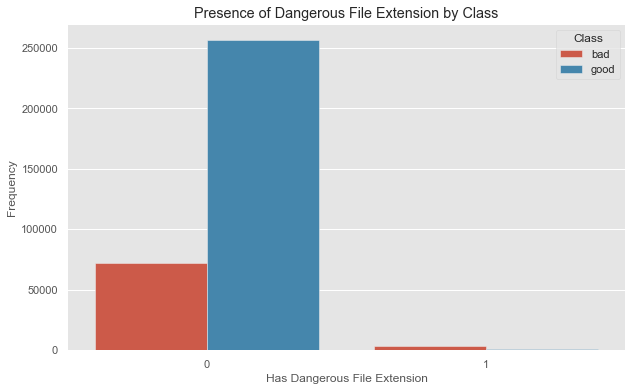

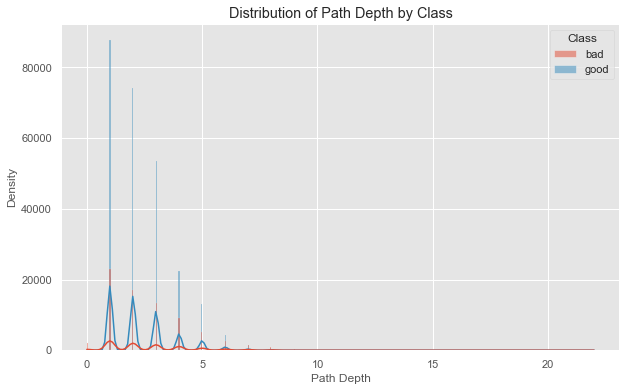

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
# function to set up all new feature engineering figures so that I don't repeat code
def setup_figure(title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# subdomain count
setup_figure('Subdomain Count by Class', 'Number of Subdomains', 'Frequency')
sns.countplot(x='subdomain_count', hue='Class', data=df)
plt.show()

# IP address presence
setup_figure('Presence of IP Address by Class', 'Contains IP Address', 'Frequency')
sns.countplot(x='contains_ip', hue='Class', data=df)
plt.show()

# special character count
setup_figure('Distribution of Special Character Count by Class', 'Special Character Count', 'Density')
sns.histplot(data=df, x='special_char_count', hue='Class', kde=True)
plt.show()

# digit count
setup_figure('Distribution of Digit Count by Class', 'Digit Count', 'Density')
sns.histplot(data=df, x='digit_count', hue='Class', kde=True)
plt.show()

# url entropy
setup_figure('Distribution of URL Entropy by Class', 'URL Entropy', 'Density')
sns.histplot(data=df, x='url_entropy', hue='Class', kde=True)
plt.show()

# period count
setup_figure('Distribution of Period Count by Class', 'Period Count', 'Density')
sns.histplot(data=df, x='period_count', hue='Class', kde=True)
plt.show()

# dangerous file extension 
setup_figure('Presence of Dangerous File Extension by Class', 'Has Dangerous File Extension', 'Frequency')
sns.countplot(x='has_dangerous_extension', hue='Class', data=df)
plt.show()

# path depth
setup_figure('Distribution of Path Depth by Class', 'Path Depth', 'Density')
sns.histplot(data=df, x='path_depth', hue='Class', kde=True)
plt.show()



Crucial for understanding the composition of the datasets and ensuring that both training and testing sets have a representative distribution of classes, which is essential for training and evaluating machine learning models accurately in the context of identifying malicious URLs.

In [176]:
# Seperate the Training and Test data

test_percentage = .2
train_df, test_df = train_test_split(df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("Seperated training and test data")

Seperated training and test data


Training Samples: 266709
Testing Samples: 66678


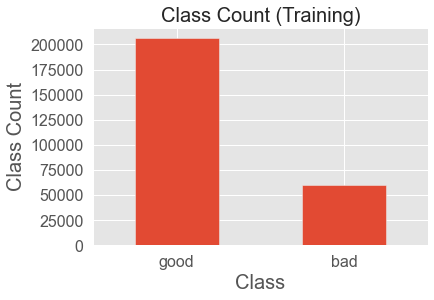

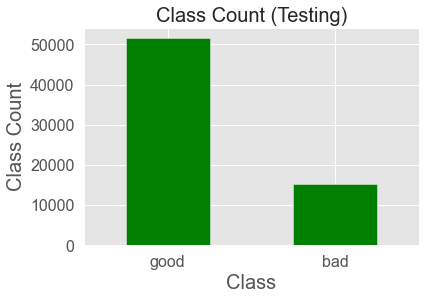

In [177]:
# Display each class
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

-----------------------------------------------------------------------------------------------------
### ---------> ML Pipeline: <----------------

I set up a ML pipeline using RandomForest classifier. Split data it into features & target variables & then to training & testing sets. Trained model on both the original features and the newly engineered features to compare performance, and below are my findings.

-----------------------------------------------------------------------------------------------------

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# define feature set X by dropping the 'Class' column and define the target y
X = df.drop('Class', axis=1)
y = df['Class']

# split dataset into training & testing sets with 20% of data for testing
# random state set for reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define sets of features for comparison: original features and extended set with new features
original_features = ['URL_length', 'HTTPS']
new_features = original_features + [
    'subdomain_count', 'contains_ip', 'special_char_count', 
    'digit_count', 'url_entropy', 'has_dangerous_extension',
    'period_count', 'path_depth']

# initialize RandomForest classifier.
model = RandomForestClassifier()

# train model using the original feature set & make predictions
model.fit(X_train[original_features], y_train)
predictions = model.predict(X_test[original_features])
print("Original Features - Classification Report:")
print(classification_report(y_test, predictions))

# re-train model using the expanded set of new features & make predictions
model.fit(X_train[new_features], y_train)
predictions = model.predict(X_test[new_features])
print("New Features - Classification Report:")
print(classification_report(y_test, predictions))



Original Features - Classification Report:
              precision    recall  f1-score   support

         bad       0.76      0.05      0.09     15149
        good       0.78      1.00      0.88     51529

    accuracy                           0.78     66678
   macro avg       0.77      0.52      0.48     66678
weighted avg       0.78      0.78      0.70     66678

New Features - Classification Report:
              precision    recall  f1-score   support

         bad       0.76      0.65      0.70     15149
        good       0.90      0.94      0.92     51529

    accuracy                           0.87     66678
   macro avg       0.83      0.79      0.81     66678
weighted avg       0.87      0.87      0.87     66678



-----------------------------------------------------------------------------------------------------
### -----------> Findings: <---------------
Precision:
- 'bad': 76% (no change)
- 'good': Increased from 78% to 90%, meaning fewer false positives for this class.

Recall:
- 'bad': Improved from 5% to 65%, meaning a vastly improved ability to correctly identify bad URLs.
- 'good': Slightly decreased from 100% to 94%, the decrease in recall for good urls is a reasonable trade-off for the improved ability to identify bad urls, this is mostly due to the old model recalling everything as good.

F1-Score:
- 'bad': Increased from 9% to 70%, showing significant improvements in both precision and recall.
- 'good': Increased from 88% to 92%, showing a balanced improvement in model performance.

Accuracy:
- ‘good’ and ‘bad’ improved from 78% to 87%, reflecting the overall enhanced ability to correctly classify both bad and good urls.
-----------------------------------------------------------------------------------------------------

a.Exploratory Data Analysis (EDA): The code demonstrates essential EDA techniques such as checking the shape of the DataFrame, viewing the first few entries with df.head(), examining column names and data types, and summarizing the dataset with df.describe(). Additionally, it checks for missing values and duplicates, which are critical steps in preprocessing data for accurate analysis.


b. Visualization: Several types of visualizations are used to explore the data further. For instance, the use of pie charts, histograms, and bar plots to visualize the distribution of URLs and classes in the dataset. Seaborn's aesthetic settings enhance the visual appeal and readability of plots, making it easier to derive insights from the visual data.


c. Feature Engineering: The code illustrates how to create new features from existing data, which can be crucial for improving model performance. For example, a new feature URL_length is derived from the length of the URLs, and a binary feature HTTPS indicates whether a URL uses HTTPS. These engineered features can provide significant inputs for machine learning models.



Overall, the code provides a comprehensive foundation for preprocessing, exploring, and preparing data for further analysis or building predictive models, illustrating best practices in handling and visualizing data effectively in Python.